# '''
This dataset contains medical and lifestyle information for 1500 patients, designed to predict the 
presence of cancer based on various features. 

'''

In [4]:
 df=pd.read_csv(r"C:\Users\OMETERE\Downloads\The_Cancer_data_1500_V2.csv")

In [5]:
df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040295,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [8]:
df.dtypes

Age                   int64
Gender                int64
BMI                 float64
Smoking               int64
GeneticRisk           int64
PhysicalActivity    float64
AlcoholIntake       float64
CancerHistory         int64
Diagnosis             int64
dtype: object

In [10]:
df['Age'].describe()

count    1500.000000
mean       50.320000
std        17.640968
min        20.000000
25%        35.000000
50%        51.000000
75%        66.000000
max        80.000000
Name: Age, dtype: float64

In [11]:
# to assign the  values to the   types  of  gender, we   carry out the  gender mapping

gender_mapping={0:'male',1:'female'}
df['Gender']=df['Gender'].map(gender_mapping)
df['Gender']

0       female
1         male
2       female
3         male
4       female
         ...  
1495    female
1496      male
1497    female
1498      male
1499    female
Name: Gender, Length: 1500, dtype: object

# QUESTIONS

# What  is   the   distribution  of  Ages  across cancer  diagnosis.


In [20]:
bins = [ 20, 30, 40, 50, 60, 70, 80, 100]
labels = [ '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['AgeGroup']
diagnosis_rate = df.groupby('AgeGroup')['Diagnosis'].mean().reset_index()
diagnosis_rate

,AgeGroup,Diagnosis
0,20-29,0.251029
1,30-39,0.289593
2,40-49,0.230769
3,50-59,0.496269
4,60-69,0.477679
5,70-79,0.465385
6,80+,0.458333


<function matplotlib.pyplot.show(close=None, block=None)>

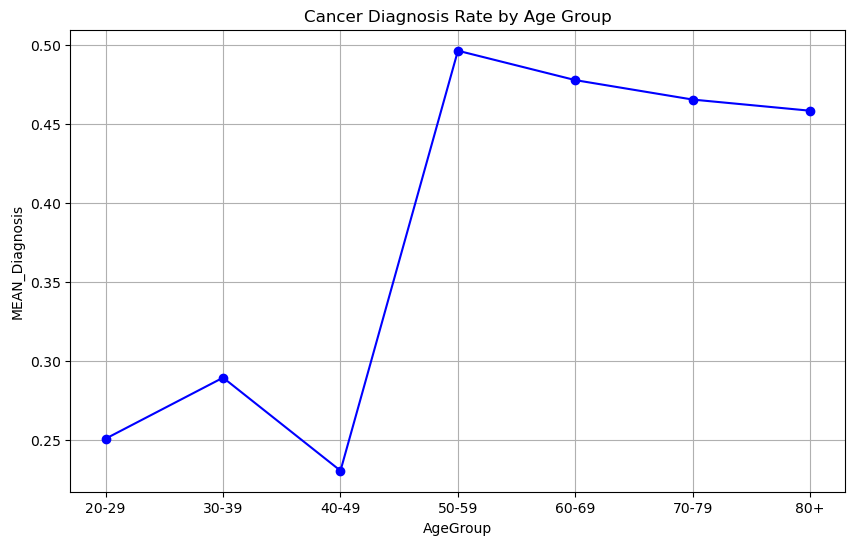

In [21]:
plt.figure(figsize=(10,6))
plt.plot(diagnosis_rate['AgeGroup'],diagnosis_rate['Diagnosis'],color='blue', marker='o')
plt.title('Cancer Diagnosis Rate by Age Group')
plt.xlabel('AgeGroup')
plt.ylabel('MEAN_Diagnosis')
plt.grid(True)
plt.savefig('Cancer Diagnosis Rate by Age Group.png',dpi=300)
plt.show

# INSIGHT
From this chart, We can deduce that most cancer patients are between 50 and 59 years old and older individuals  there after. 
Also, the least affected age range is 40-49


# how  do the different  medical and  lifestyle  factors  affects  the  Diagnosis of  cancer.

In [12]:
correlation_matrix=df.corr()
correlation_matrix

,Age,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
Age,1.000000,0.030246,-0.013914,-0.027025,0.016396,0.003209,-0.010996,0.196603
BMI,0.030246,1.000000,-0.012616,0.011392,0.011480,0.004711,-0.010824,0.187560
Smoking,-0.013914,-0.012616,1.000000,-0.021039,-0.043817,-0.001660,0.016368,0.226999
GeneticRisk,-0.027025,0.011392,-0.021039,1.000000,-0.039721,-0.016864,-0.010833,0.253472
PhysicalActivity,0.016396,0.011480,-0.043817,-0.039721,1.000000,0.033856,0.018136,-0.150089
AlcoholIntake,0.003209,0.004711,-0.001660,-0.016864,0.033856,1.000000,0.055403,0.212772
CancerHistory,-0.010996,-0.010824,0.016368,-0.010833,0.018136,0.055403,1.000000,0.392188
Diagnosis,0.196603,0.187560,0.226999,0.253472,-0.150089,0.212772,0.392188,1.000000


In [13]:
diagnosis_correlations = correlation_matrix['Diagnosis'].drop('Diagnosis').reset_index()
diagnosis_correlations

,index,Diagnosis
0,Age,0.196603
1,BMI,0.187560
2,Smoking,0.226999
3,GeneticRisk,0.253472
4,PhysicalActivity,-0.150089
5,AlcoholIntake,0.212772
6,CancerHistory,0.392188


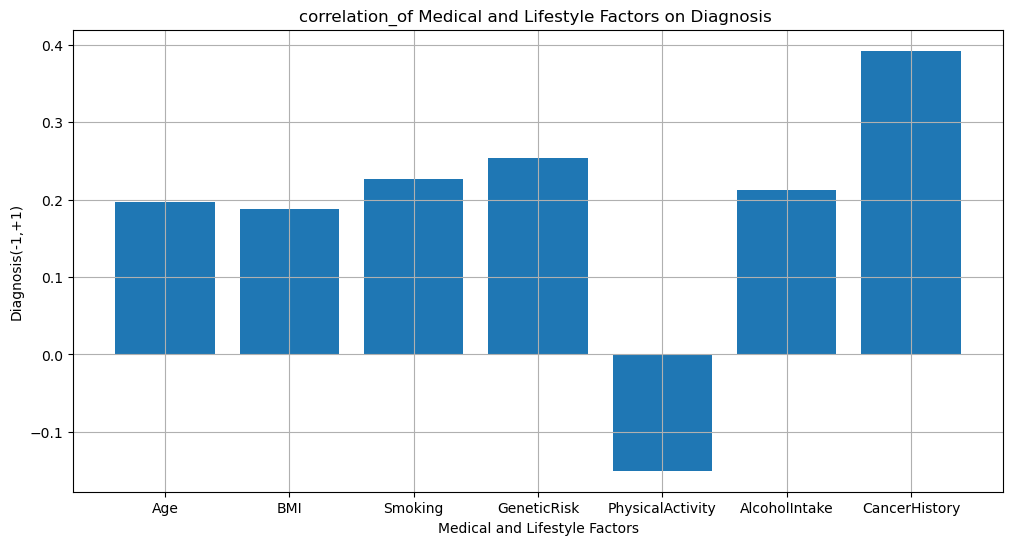

In [14]:
# Visualize the correlation matrix using a bar chat
plt.figure(figsize=(12, 6))
plt.bar(diagnosis_correlations['index'],diagnosis_correlations['Diagnosis'])
plt.title('correlation_of Medical and Lifestyle Factors on Diagnosis ')
plt.xlabel('Medical and Lifestyle Factors')
plt.ylabel('Diagnosis(-1,+1)')
plt.grid()
plt.show()

# INSIGHT
 We noticed that all  factors moves in the  positive direction and  only  physical  activity   moves  in  the negative   direction.
 
This means  that   for all other  factors except  physical  activity  increases the chances of  cancer  diagnosis as you  do  them more  of have  them more.

As physical  activity   increases the chances of cancer diagnosis decreases.


# What is the rate of cancer recurrence among individuals with a prior history of cancer across different age groups? Also, calculate the  rate of  cancer  history  reoccurrence


In [22]:
bins = [ 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df['Recurrence'] = np.where((df['CancerHistory'] == 1) & (df['Diagnosis'] == 1), 1, 0)
recurrence_rate_and_smoking= df.groupby('AgeGroup')['Recurrence','Smoking'].mean().reset_index()
recurrence_rate_and_smoking


C:\Users\OMETERE\AppData\Local\Temp\ipykernel_19184\2838001692.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  recurrence_rate_and_smoking= df.groupby('AgeGroup')['Recurrence','Smoking'].mean().reset_index()


,AgeGroup,Recurrence,Smoking
0,20-29,0.086420,0.263374
1,30-39,0.117647,0.280543
2,40-49,0.107692,0.265385
3,50-59,0.164179,0.309701
4,60-69,0.111607,0.254464
5,70-79,0.123077,0.246154
6,80,0.166667,0.208333


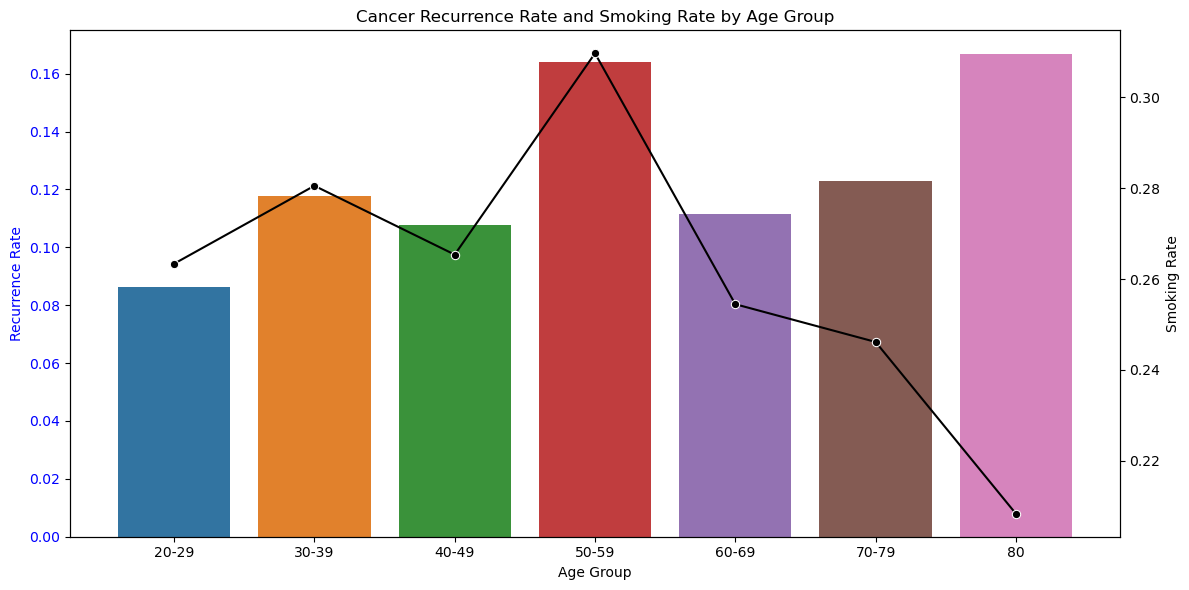

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot recurrence rate
sns.barplot(x='AgeGroup', y='Recurrence', data=recurrence_rate_and_smoking, ax=ax1)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Recurrence Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x='AgeGroup', y='Smoking', data=recurrence_rate_and_smoking, color='black', marker='o', ax=ax2)
ax2.set_ylabel('Smoking Rate', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Cancer Recurrence Rate and Smoking Rate by Age Group')
fig.tight_layout()
plt.show()

# INSIGHT
From this chart, We can deduce that most cancer patients are between 50 and 59 , and   70-80 has higher  chances  of  reoccurrence



In [19]:
cancer_history=df[df['CancerHistory']==1]
re_occurence=cancer_history[cancer_history['Diagnosis']==1]
re_occurence_rate= len(re_occurence)/len(cancer_history)*100
re_occurence_rate

83.33333333333334